# Recurrent Neural Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
prices = pd.read_csv('market-price.csv')

In [3]:
prices.head()

,2018-05-02 00:00:00,9221.426
0,2018-05-03 00:00:00,9639.268333
1,2018-05-04 00:00:00,9710.730000
2,2018-05-05 00:00:00,9803.306667
3,2018-05-06 00:00:00,9630.136277
4,2018-05-07 00:00:00,9345.690000


In [4]:
prices.columns = ['time','price']
prices.head()

,time,price
0,2018-05-03 00:00:00,9639.268333
1,2018-05-04 00:00:00,9710.730000
2,2018-05-05 00:00:00,9803.306667
3,2018-05-06 00:00:00,9630.136277
4,2018-05-07 00:00:00,9345.690000


In [5]:
prices.set_index('time',inplace=True)


In [6]:
prices.head()

,price
time,
2018-05-03 00:00:00,9639.268333
2018-05-04 00:00:00,9710.730000
2018-05-05 00:00:00,9803.306667
2018-05-06 00:00:00,9630.136277
2018-05-07 00:00:00,9345.690000


In [7]:
prices.index = pd.to_datetime(prices.index)

In [8]:
prices.head()

,price
time,
2018-05-03,9639.268333
2018-05-04,9710.730000
2018-05-05,9803.306667
2018-05-06,9630.136277
2018-05-07,9345.690000


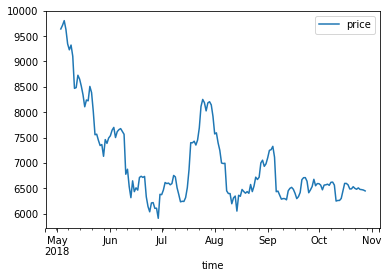

In [9]:
prices.plot()

In [10]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 179 entries, 2018-05-03 to 2018-10-28
Data columns (total 1 columns):
price    179 non-null float64
dtypes: float64(1)
memory usage: 2.8 KB


In [11]:
TAIL_CNT = 14
train_set = prices.head(TAIL_CNT*12)

In [12]:
train_set.head()

,price
time,
2018-05-03,9639.268333
2018-05-04,9710.730000
2018-05-05,9803.306667
2018-05-06,9630.136277
2018-05-07,9345.690000


In [13]:
test_set = prices.tail(TAIL_CNT)

In [14]:
test_set

,price
time,
2018-10-15,6452.571667
2018-10-16,6596.618333
2018-10-17,6596.276154
2018-10-18,6568.040769
2018-10-19,6487.444167
2018-10-20,6488.825833
2018-10-21,6531.601667
2018-10-22,6498.485833
2018-10-23,6481.426000


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_set)
test_scaled = scaler.transform(test_set)

In [16]:
def next_batch(training_data,batch_size,steps):
    rand_start = np.random.randint(0,len(training_data)-steps) 
    y_batch = np.array(training_data[rand_start:rand_start+steps+1]).reshape(1,steps+1)

    return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1) 

In [17]:
import tensorflow as tf

In [18]:
num_inputs = 1
num_time_steps = TAIL_CNT
num_neurons = 100
num_outputs = 1
learning_rate = 0.03
num_train_iterations = 2000
batch_size = 1

In [19]:
X = tf.placeholder(tf.float32, [None, num_time_steps, num_inputs])
y = tf.placeholder(tf.float32, [None, num_time_steps, num_outputs])

In [20]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicLSTMCell(num_units=num_neurons, activation=tf.nn.relu),
    output_size=num_outputs) 

Instructions for updating:
This class is deprecated, please use tf.nn.rnn_cell.LSTMCell, which supports all the feature this cell currently has. Please replace the existing code with tf.nn.rnn_cell.LSTMCell(name='basic_lstm_cell').


In [21]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [22]:
loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

In [23]:
init = tf.global_variables_initializer()

In [24]:
saver = tf.train.Saver()

In [25]:
with tf.Session(config=tf.ConfigProto()) as sess:
    sess.run(init)
    
    for iteration in range(num_train_iterations):
        
        X_batch, y_batch = next_batch(train_scaled,batch_size,num_time_steps)
        sess.run(train, feed_dict={X: X_batch, y: y_batch})
        
        if iteration % 100 == 0:
            
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    # Save Model for Later
    saver.save(sess, "./model2/rnn_model")

0 	MSE: 0.19613874
100 	MSE: 0.010964601
200 	MSE: 0.0007052385
300 	MSE: 0.00094290037
400 	MSE: 0.0023970653
500 	MSE: 0.0010300222
600 	MSE: 0.0026471687
700 	MSE: 0.0062885666
800 	MSE: 0.0031408896
900 	MSE: 0.002717069
1000 	MSE: 0.0016510157
1100 	MSE: 0.002600547
1200 	MSE: 0.00055920536
1300 	MSE: 0.0018615148
1400 	MSE: 0.004136685
1500 	MSE: 0.0047345525
1600 	MSE: 0.0018456882
1700 	MSE: 0.0021083518
1800 	MSE: 0.0030192386
1900 	MSE: 0.001798847


In [26]:
test_set

,price
time,
2018-10-15,6452.571667
2018-10-16,6596.618333
2018-10-17,6596.276154
2018-10-18,6568.040769
2018-10-19,6487.444167
2018-10-20,6488.825833
2018-10-21,6531.601667
2018-10-22,6498.485833
2018-10-23,6481.426000


In [27]:
with tf.Session() as sess:
    saver.restore(sess, "./model2/rnn_model")
    train_seed = list(train_scaled[-TAIL_CNT:])
    
    for iteration in range(TAIL_CNT):
        X_batch = np.array(train_seed[-num_time_steps:]).reshape(1, num_time_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        train_seed.append(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from ./model2/rnn_model


In [28]:
train_seed

[array([0.16816236]),
 array([0.16942586]),
 array([0.17274777]),
 array([0.16685521]),
 array([0.18226889]),
 array([0.18307616]),
 array([0.16800338]),
 array([0.08728315]),
 array([0.09033738]),
 array([0.09036691]),
 array([0.10031743]),
 array([0.13964684]),
 array([0.17663306]),
 array([0.1765452]),
 0.16416708,
 0.14704299,
 0.12717943,
 0.1063898,
 0.08953639,
 0.07919914,
 0.07439278,
 0.073502846,
 0.07493195,
 0.0773771,
 0.079940856,
 0.08211639,
 0.08370086,
 0.08468761]

In [29]:
results = scaler.inverse_transform(np.array(train_seed[TAIL_CNT:]).reshape(TAIL_CNT,1))

In [30]:
test_set['Generated'] = results

/Users/seojungwon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
test_set

,price,Generated
time,,
2018-10-15,6452.571667,6548.068359
2018-10-16,6596.618333,6481.376953
2018-10-17,6596.276154,6404.016113
2018-10-18,6568.040769,6323.048828
2018-10-19,6487.444167,6257.411133
2018-10-20,6488.825833,6217.151855
2018-10-21,6531.601667,6198.433105
2018-10-22,6498.485833,6194.966797
2018-10-23,6481.426000,6200.533203


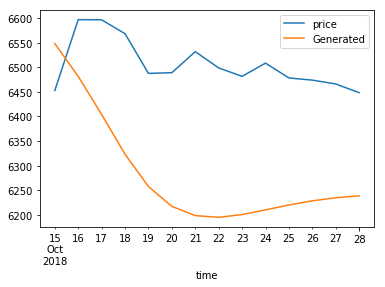

In [32]:
test_set.plot()